# Deep Learning | Training Neural Networks

### Dataset: MNIST| Framework: Keras (Tensorflow)

## 🔹 1. Setup & Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.datasets import mnist

2025-04-28 20:16:29.445935: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745853389.459937   82125 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745853389.463991   82125 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 20:16:29.480032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

### ✅ EDA and Preprocessing

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<Axes: ylabel='count'>

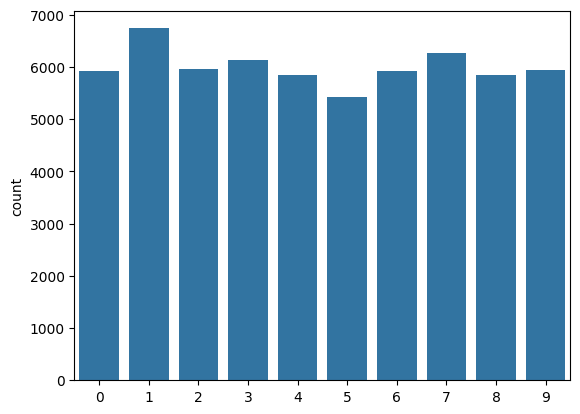

In [8]:
sns.countplot(x=y_train)

In [9]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

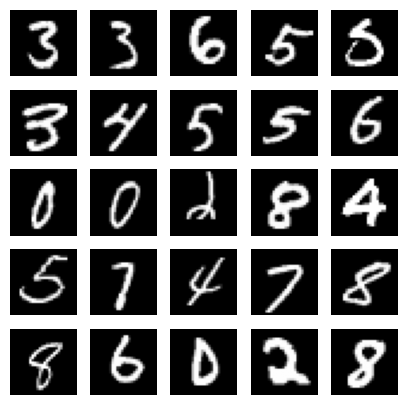

In [10]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray'); plt.axis('off') 

In [11]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [12]:
# image dimensions (assumed square)

image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [13]:
# resize x_train and x_test since input is expected to be a 1D tensor

print(f"before : {x_train.shape}")

x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

print(f"after  : {x_train.shape}")

before : (60000, 28, 28)
after  : (60000, 784)


In [17]:
print(np.max(x_train))
print(np.min(x_train))

1.0
0.0


In [16]:
#normalize to avoid large gradient values that could make training difficult

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## 🔹 2. Train MLP on MNIST

### ✅ Model is a 3-layer MLP with ReLU activation function

In [18]:
model = Sequential()
model.add(Input(shape=(input_size,)))
model.add(Dense(256, activation='relu', name="first_dense"))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

model.summary()

I0000 00:00:1745854471.475622   82125 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4441 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_dense (Dense)             │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

### ✅ Train the model

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


I0000 00:00:1745854657.649341   82372 service.cc:148] XLA service 0x7f088800a600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745854657.649376   82372 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-04-28 20:37:37.664220: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745854657.739415   82372 cuda_dnn.cc:529] Loaded cuDNN version 90300


 68/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 1.1308    

I0000 00:00:1745854658.599737   82372 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8472 - loss: 0.5369 - val_accuracy: 0.9585 - val_loss: 0.1392
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1198 - val_accuracy: 0.9689 - val_loss: 0.1071
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0697 - val_accuracy: 0.9733 - val_loss: 0.0872
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9722 - val_loss: 0.0889
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0340 - val_accuracy: 0.9756 - val_loss: 0.0882
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9919 - loss: 0.0239 - val_accuracy: 0.9742 - val_loss: 0.0929
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9722 - val_loss: 0.1076
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9743 - val_

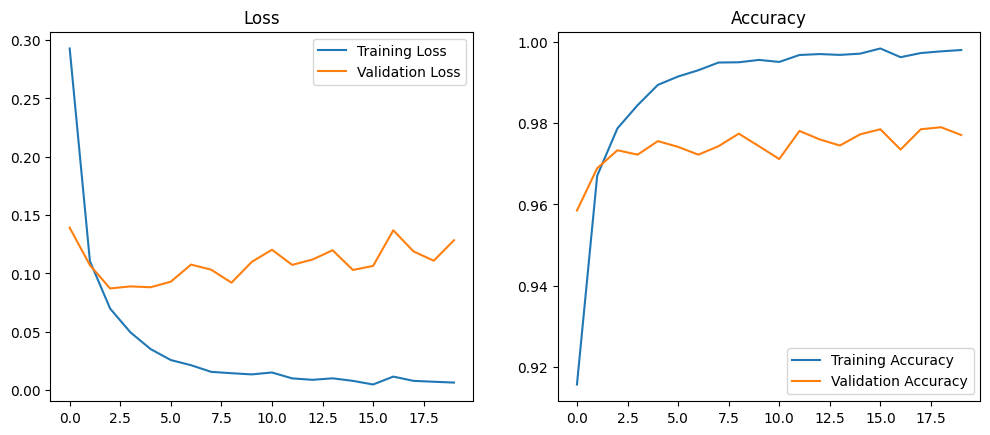

In [21]:
# View learning history in terms of loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)
ax1.plot(model.history.history['loss'], label='Training Loss')
ax1.plot(model.history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()
ax2.plot(model.history.history['accuracy'], label='Training Accuracy')
ax2.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()

### ✅ Evaluate model's performance

In [22]:
loss1, acc1 = model.evaluate(x_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.1295    
Test accuracy : 97.70%
Test loss     : 11.66%


## 🔹 3. Model Optimization

### ✅ Regularization

In [23]:
model2 = Sequential()

model2.add(Dense(256, activation='relu', input_dim=input_size))
model2.add(Dropout(0.2))

model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(num_labels, activation='softmax'))

model2.summary()

/home/ai/miniconda3/envs/dl/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8201 - loss: 0.6132 - val_accuracy: 0.9570 - val_loss: 0.1448
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9539 - loss: 0.1529 - val_accuracy: 0.9693 - val_loss: 0.1057
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9688 - loss: 0.1035 - val_accuracy: 0.9717 - val_loss: 0.0975
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9754 - loss: 0.0789 - val_accuracy: 0.9742 - val_loss: 0.0877
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0622 - val_accuracy: 0.9770 - val_loss: 0.0816
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9814 - loss: 0.0566 - val_accuracy: 0.9773 - val_loss: 0.0800
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9850 - loss: 0.0449 - val_accuracy: 0.9782 - val_loss: 0.0782
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0361 - val_accuracy: 0.

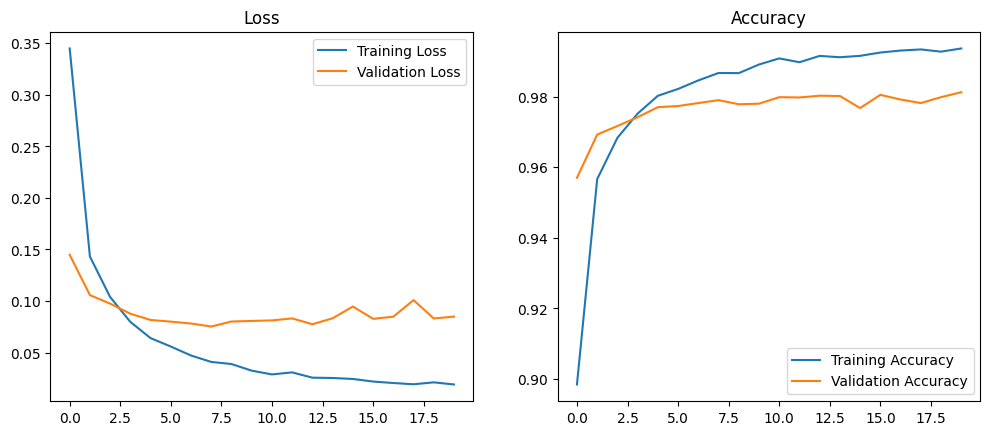

In [25]:
# View learning history in terms of loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)
ax1.plot(model2.history.history['loss'], label='Training Loss'); 
ax1.plot(model2.history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()
ax2.plot(model2.history.history['accuracy'], label='Training Accuracy'); 
ax2.plot(model2.history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()

In [26]:
# Evaluate the model performance

loss2, acc2 = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {100*acc2:.2f}%")
print(f"Test loss: {100*loss2:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0807       
Test accuracy: 98.25%
Test loss: 7.25%
